In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import *

In [2]:
path = '../all_patients_sample_size_100_for_both_pos_neg.csv'
raw_df = pd.read_csv(path)
print(f'raw_df shape: {raw_df.shape}')
raw_df.groupby(['Patient ID', 'Study ID']).size()
num_unique_patients = raw_df.groupby(['Patient ID']).size()
assert num_unique_patients.shape[0] == 900-1
num_unique_studies = raw_df.groupby(['Patient ID', 'Study ID']).size()
assert num_unique_studies.shape[0] == 1014-1

remove_all_0s = raw_df[~(raw_df['Block Size'] == '0')]
print(remove_all_0s.shape)
# Load the dataset
df = remove_all_0s.reset_index(drop = True)

# First split: Separate out the test set
train_val_idx, test_idx = train_test_split(df.index, test_size=0.2, stratify=df['Positive Tumor'], random_state=42)
# Second split: Split the remaining data into training and validation sets
train_val_df = df.loc[train_val_idx]
test_df = df.loc[test_idx]
train_idx, valid_idx = train_test_split(train_val_idx, test_size=0.25, stratify=train_val_df['Positive Tumor'], random_state=42)
train_df = df.loc[train_idx]
val_df = df.loc[valid_idx]

# Create a new column called 'Diagnosis' in the raw_df
# tuples = list(zip(raw_df['Patient ID'], raw_df['Study ID']))
# Now map these tuples to their corresponding diagnosis using the diagnosis_dict
# raw_df['Diagnosis'] = pd.Series(tuples).map(diagnosis_dict)

features = np.load("../ori_reso_all_dataset.npy", allow_pickle=True)
print(features.shape)
labels =np.load("../ori_reso_all_labels.npy", allow_pickle=True)
print(labels.shape)

raw_df shape: (152076, 6)
(151134, 6)
(151134, 3, 3, 3)
(151134,)


In [25]:
train_labels = np.load("../train_labels.npy", allow_pickle=True)

In [28]:
train_labels[:20]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [29]:
train_df.head(20)

,Patient ID,Study ID,Tumor idx,Coordinate,Block Size,Positive Tumor
87934,PETCT_9a418f3b3a,05-11-2003-NA-PET-CT Ganzkoerper primaer mit ...,52,"(157,201,217)","(3,3,3)",0
60035,PETCT_6543c58e13,02-25-2001-NA-PET-CT Ganzkoerper primaer mit ...,37,"(221,195,212)","(3,3,3)",2
31671,PETCT_390129c0d2,04-27-2007-NA-PET-CT Ganzkoerper primaer mit ...,76,"(224,185,320)","(3,3,3)",0
12465,PETCT_17d334cb6c,08-28-2000-NA-Unspecified CT ABDOMEN-62383,86,"(153,191,206)","(3,3,3)",2
130775,PETCT_dc15c1d9bb,06-03-2005-NA-PET-CT Ganzkoerper primaer mit ...,73,"(209,256,272)","(3,3,3)",0
18304,PETCT_21853fc15b,10-12-2002-NA-PET-CT Ganzkoerper primaer mit ...,63,"(165,167,219)","(3,3,3)",2
113785,PETCT_c2a51a65c6,09-15-2002-NA-PET-CT Ganzkoerper primaer mit ...,68,"(196,228,199)","(3,3,3)",0
100733,PETCT_ae8c77a995,05-18-2007-NA-PET-CT Ganzkoerper nativ-79472,33,"(196,188,179)","(3,3,3)",0
9163,PETCT_13b40a817b,02-18-2001-NA-PET-CT Ganzkoerper primaer mit ...,33,"(194,216,187)","(3,3,3)",0
151008,PETCT_ff1451316e,03-31-2003-NA-PET-CT Ganzkoerper primaer mit ...,74,"(247,160,173)","(3,3,3)",0


In [23]:
labels[10469]

1

In [22]:
features[10469].shape

(3, 3, 3)

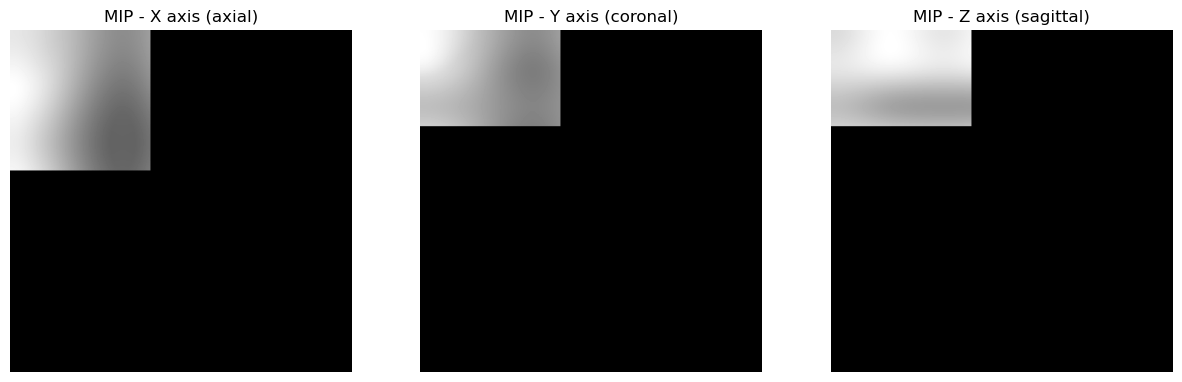

In [6]:
block = scale_up_block(features[10469]).astype(np.float32)
mip_x = np.max(block, axis=0) # X-axis projection
mip_y = np.max(block, axis=1) # Y-axis projection
mip_z = np.max(block, axis=2) # Z-axis projection


# Visualize the MIPs
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(mip_x, cmap='gray')
axs[0].set_title('MIP - X axis (axial)')
axs[0].axis('off')

axs[1].imshow(mip_y, cmap='gray')
axs[1].set_title('MIP - Y axis (coronal)')
axs[1].axis('off')

axs[2].imshow(mip_z, cmap='gray')
axs[2].set_title('MIP - Z axis (sagittal)')
axs[2].axis('off')
plt.show()

In [1]:
[1] + [2]

[1, 2]